Este codigo ajusta una funcion lineal, 
logaritmica, y exponencial a un conjunto de datos x,y, y devuelve la función que minimice más el error

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math 

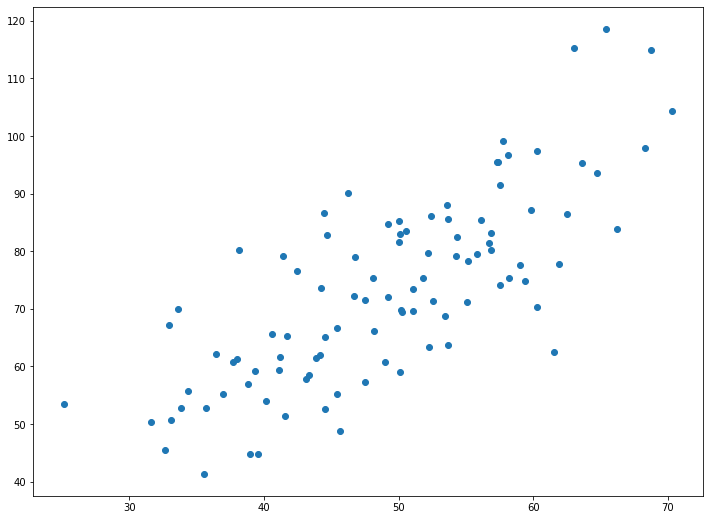

In [43]:
data = pd.read_csv('data.csv')
x = data.iloc[:, 0]
y = data.iloc[:, 1]
plt.scatter(x,y)
plt.show()

In [44]:
# Gradient Descent for Linear Regression
# y = predicted
# yhat = true value 
# cost function = (y-yhat)**2 / N 

xvector = np.array(x)
print(x)
#numero de alumnos
yvector = np.array(y)
print(y)

# Parameters
w = 0.0 
b = 0.0 

# Hyperparameter 
learning_rate = 0.0001

# Gradient descent function
def descend(x, y, w, b, learning_rate): 
    dldw = 0.0 
    dldb = 0.0 
    N = x.shape[0]

    # loss = (y-(wx+b)))**2
    for xi, yi in zip(x,y): 
       dldw += -2*xi*(yi-(w*xi+b))
       dldb += -2*(yi-(w*xi+b))
    
    # Make an update to the w parameter 
    w = w - learning_rate*(1/N)*dldw
    b = b - learning_rate*(1/N)*dldb
    return w, b 

# linear regression
for i in range(500): 
    w,b = descend(xvector,yvector,w,b,learning_rate)
    yhat = w*x + b
    loss = np.divide(np.sum((y-yhat)**2, axis=0), x.shape[0]) 
    print(f'{i} loss is {loss}, paramters w:{w}, b:{b}')
loss1 = loss

# logaritmic regression  
# actualizacion de los datos a x = ln(x) , y = ln(y)
xvectorln = np.log(xvector)
yvectorln = np.log(yvector)

for i in range(len(xvectorln)):
    w,b = descend(xvectorln,yvectorln,w,b,learning_rate)
    yhat2 = (math.exp(b)*(x**w))
    loss = np.sum((((math.exp(b))*(xvectorln[i]**w))-(yvectorln[i]))**2)
loss2 = loss
# Iteratevely make updates for exponential regression
# actualizacion de los datos a x se queda xvector , y = ln(y)
yvectorexp = np.log(yvector)

for i in range(len(yvectorln)):
    w,b = descend(xvector,yvectorln,w,b,learning_rate)
    yhat3 = (math.exp(b))*math.exp(w*xvector[i])
    loss = np.sum((((math.exp(b)*(math.exp(w*xvector[i]))))-(yvectorln[i]))**2)
loss2 = loss


0     53.426804
1     61.530358
2     47.475640
3     59.813208
4     55.142188
        ...    
94    50.030174
95    49.239765
96    50.039576
97    48.149859
98    25.128485
Name: 32.502345269453031, Length: 99, dtype: float64
0     68.777596
1     62.562382
2     71.546632
3     87.230925
4     78.211518
        ...    
94    81.536991
95    72.111832
96    85.232007
97    66.224958
98    53.454394
Name: 31.70700584656992, Length: 99, dtype: float64
0 loss is 1479.0416101839724, paramters w:0.7424335285415493, b:0.014629895049539552
1 loss is 451.30505308542973, paramters w:1.1126970531564835, b:0.02196251949501772
2 loss is 195.68774460937084, paramters w:1.2973530613136097, b:0.02565587059950957
3 loss is 132.11090809728884, paramters w:1.3894434413943608, b:0.027534253868739502
4 loss is 116.29812220081075, paramters w:1.4353697670003447, b:0.028507481513835913
5 loss is 112.36514740853725, paramters w:1.4582732927875135, b:0.02902929237235795
6 loss is 111.38690342476136, paramt

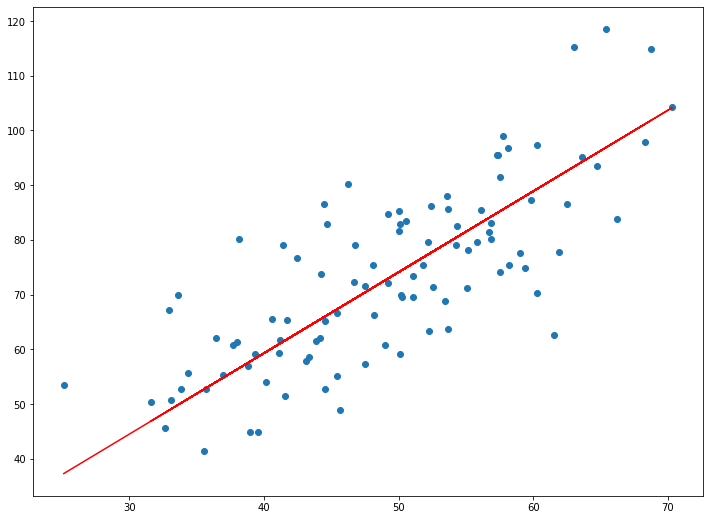

In [49]:
plt.rcParams['figure.figsize'] = (12.0, 9.0)
plt.scatter(xvector,yvector)
plt.plot(x,yhat, color='red')
plt.show()

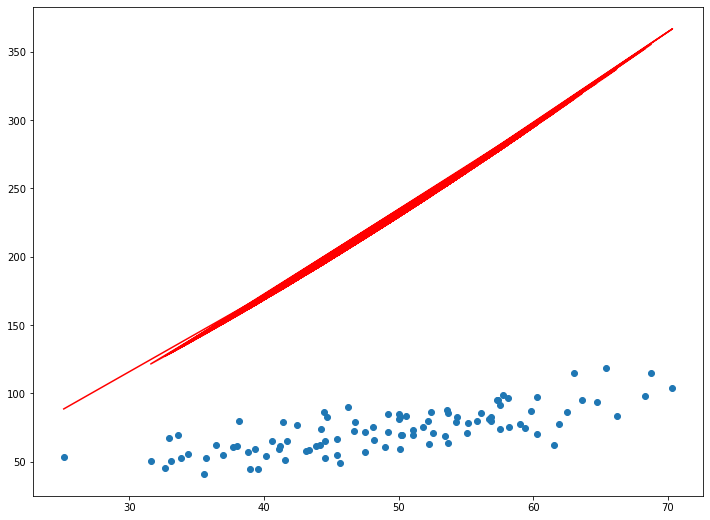

In [48]:
plt.rcParams['figure.figsize'] = (12.0, 9.0)
plt.scatter(xvector,yvector)
plt.plot(x,yhat2, color='red')
plt.show()

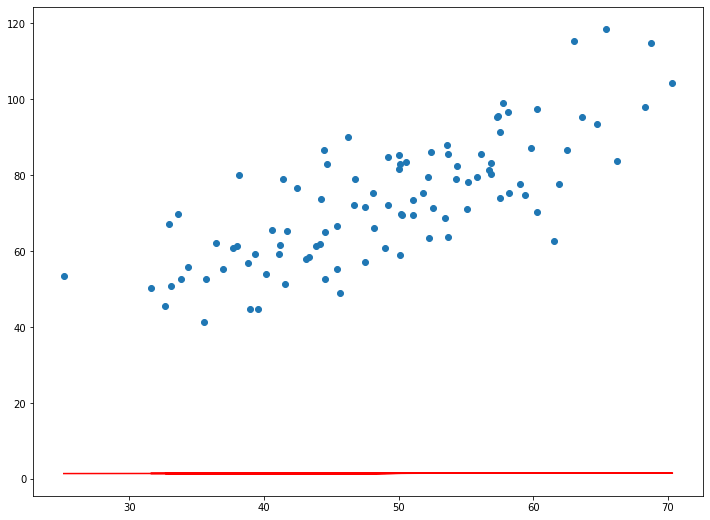

In [50]:
plt.rcParams['figure.figsize'] = (12.0, 9.0)
plt.scatter(xvector,yvector)
plt.plot(x,yhat3, color='red')
plt.show()